In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_train = pd.read_hdf("./output/filtered_jetclass_train.h5", key="df")
df_val = pd.read_hdf("./output/filtered_jetclass_val.h5", key="df")
df_test = pd.read_hdf("./output/filtered_jetclass_test.h5", key="df")

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(4000000, 17)
(1000000, 17)
(1000064, 17)


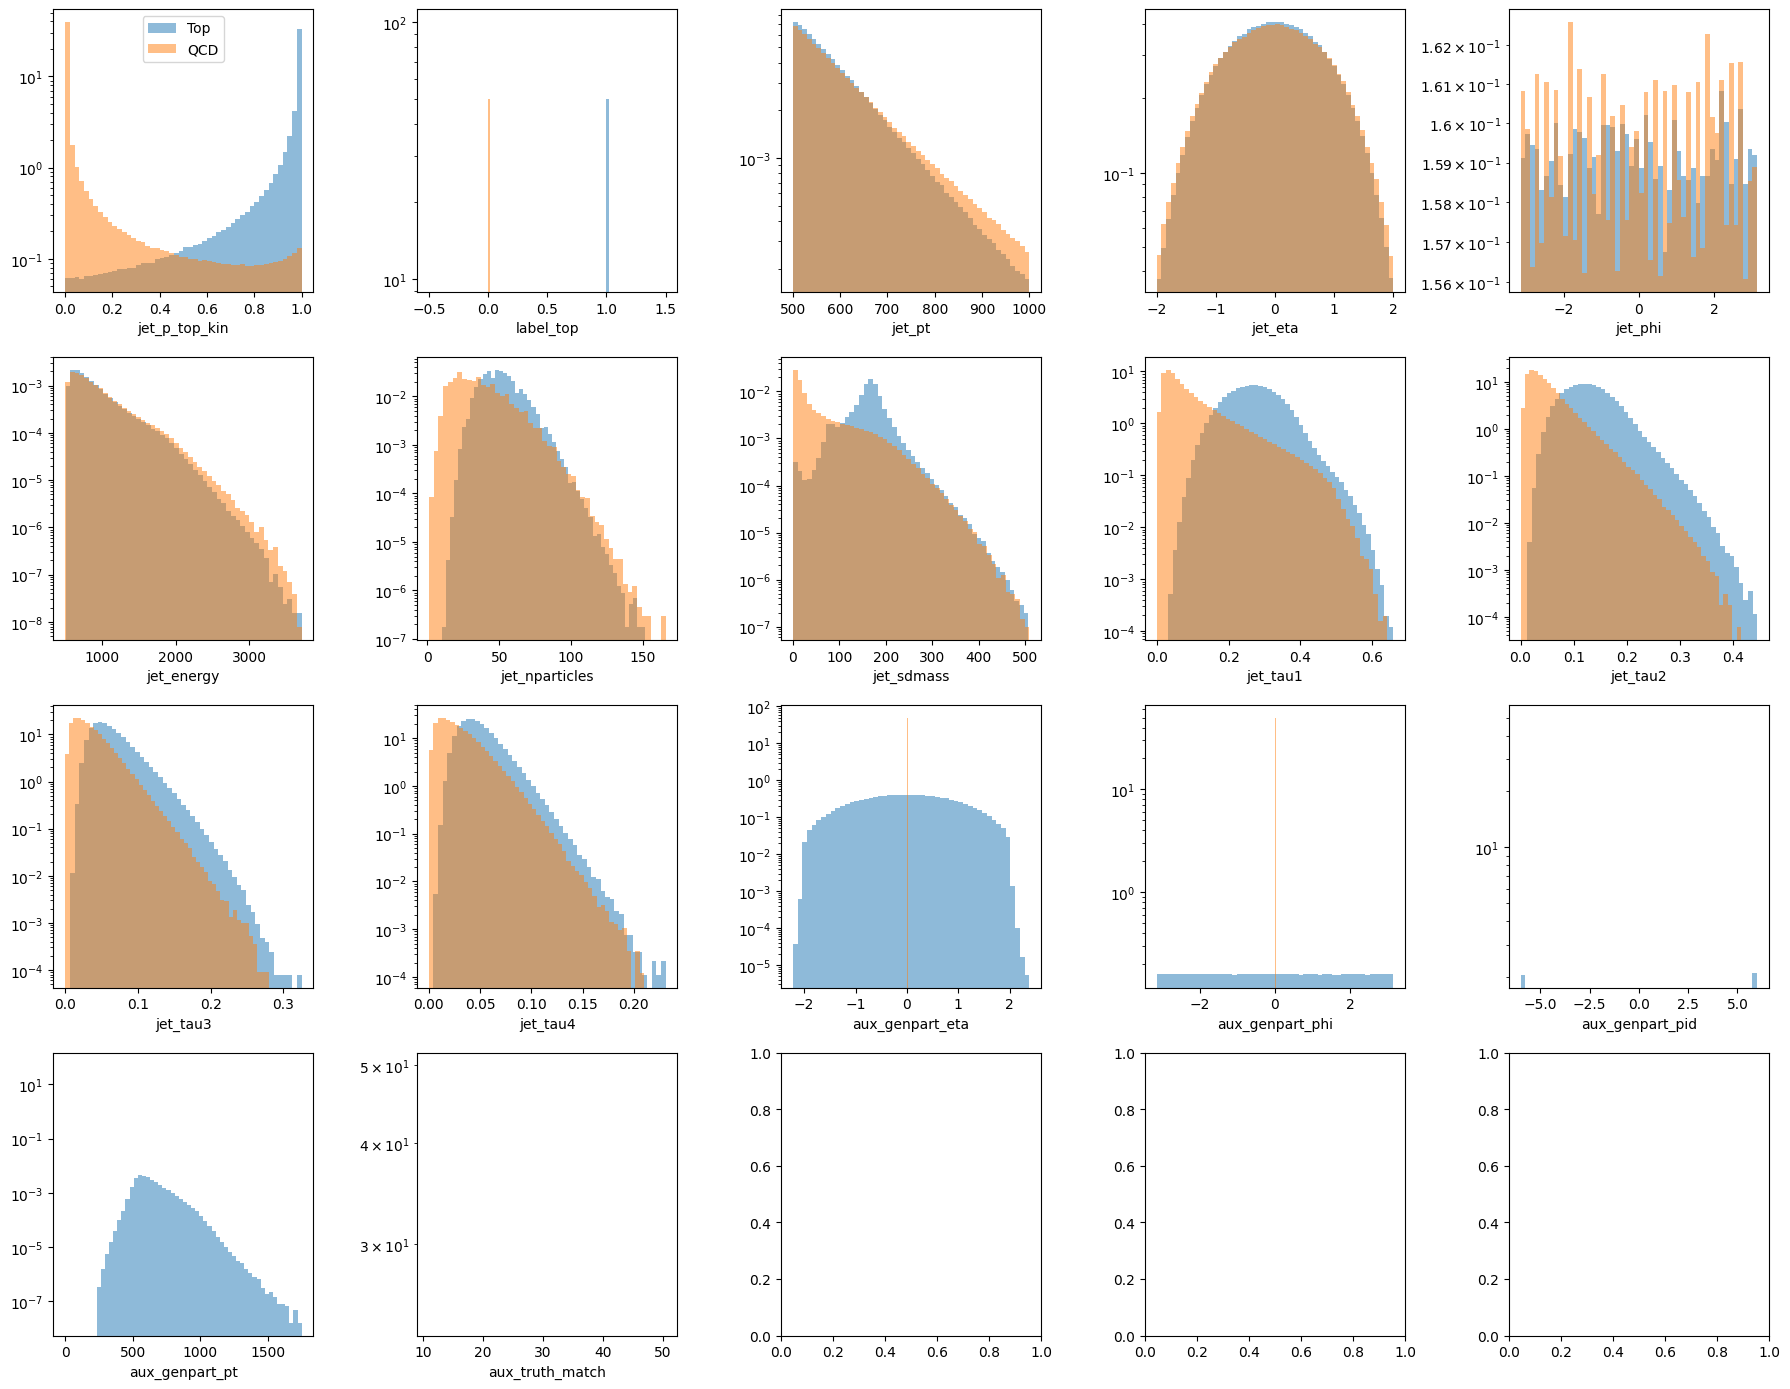

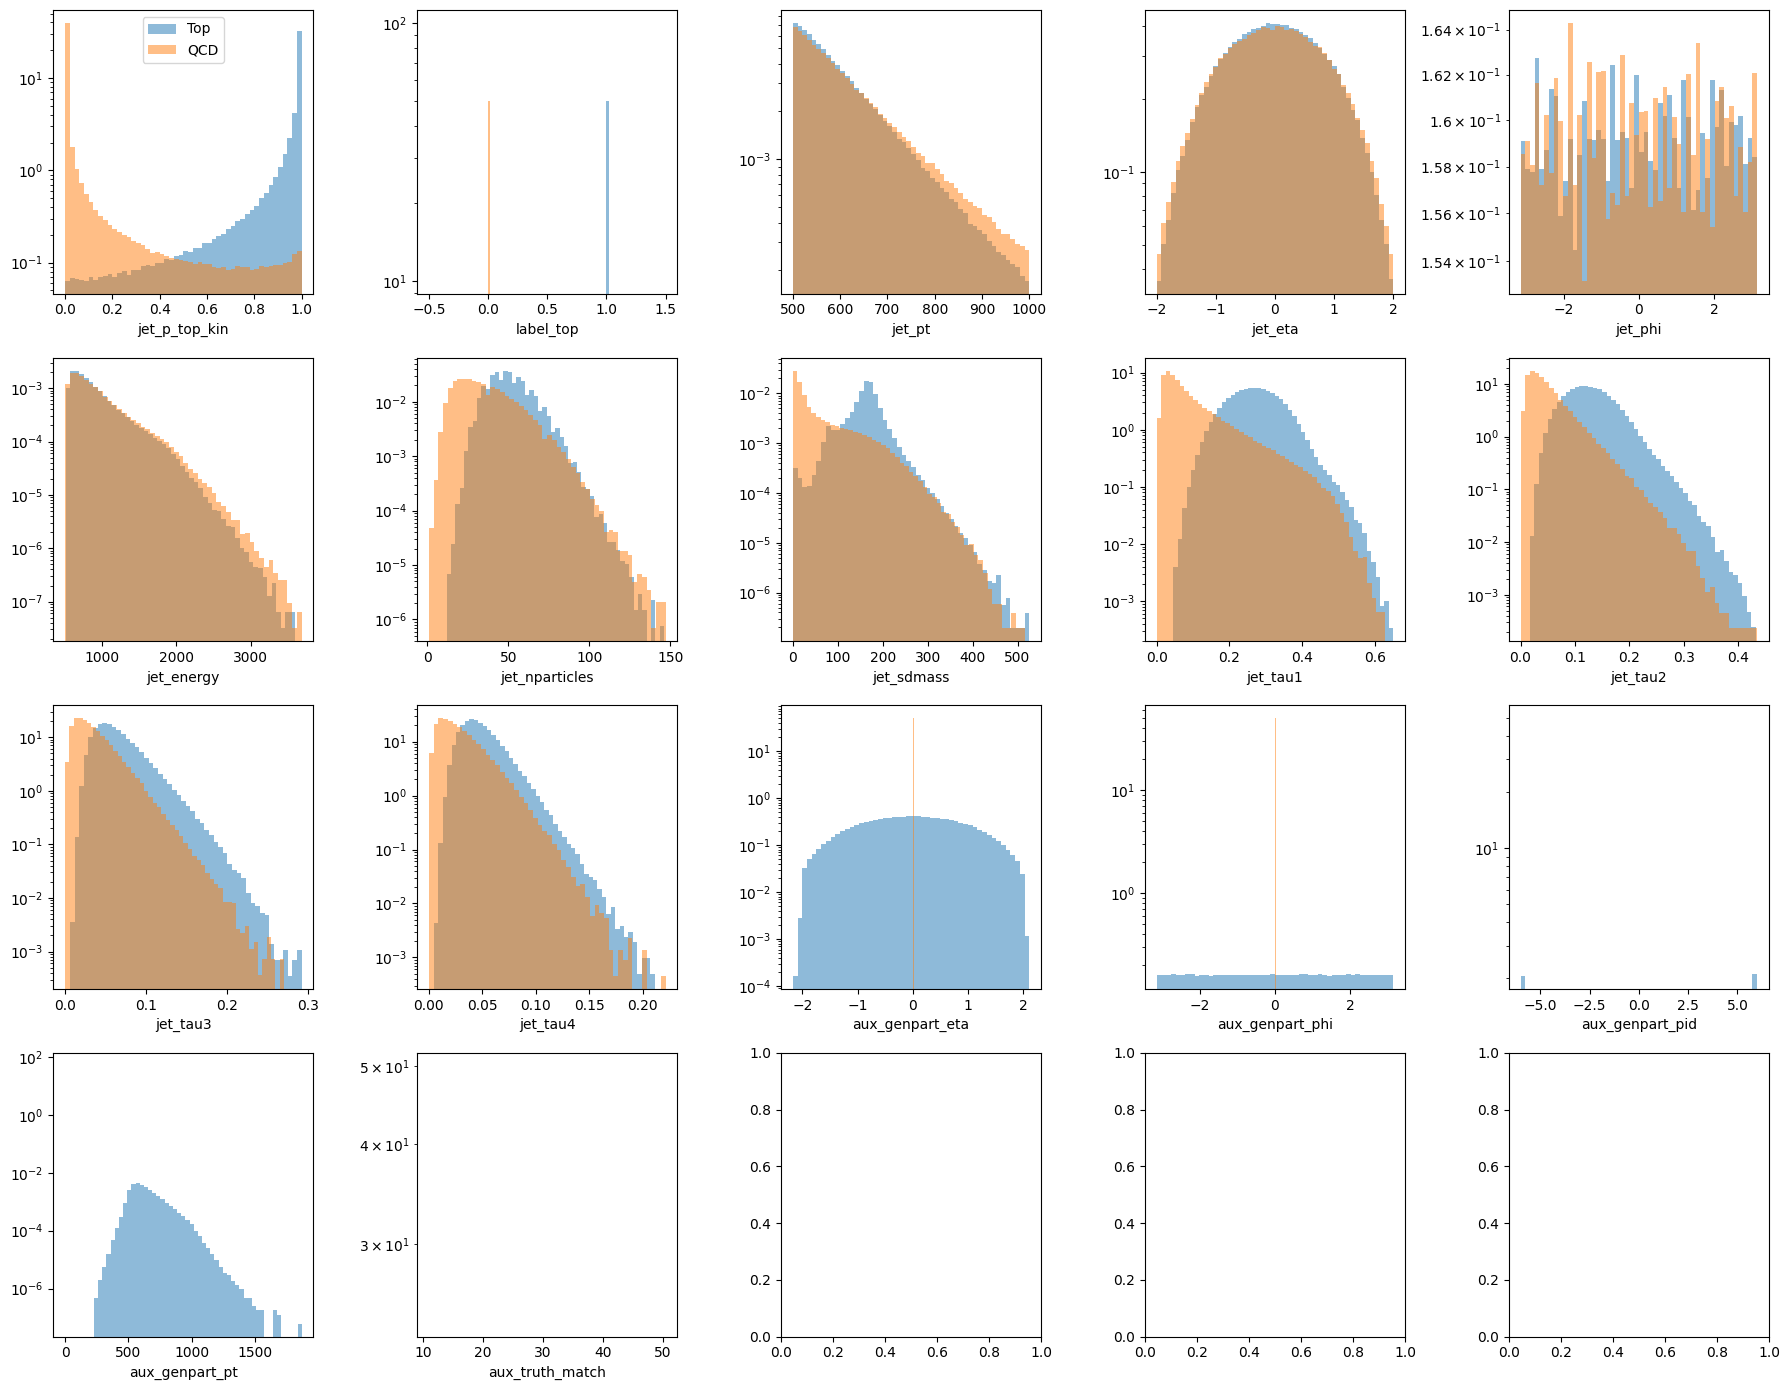

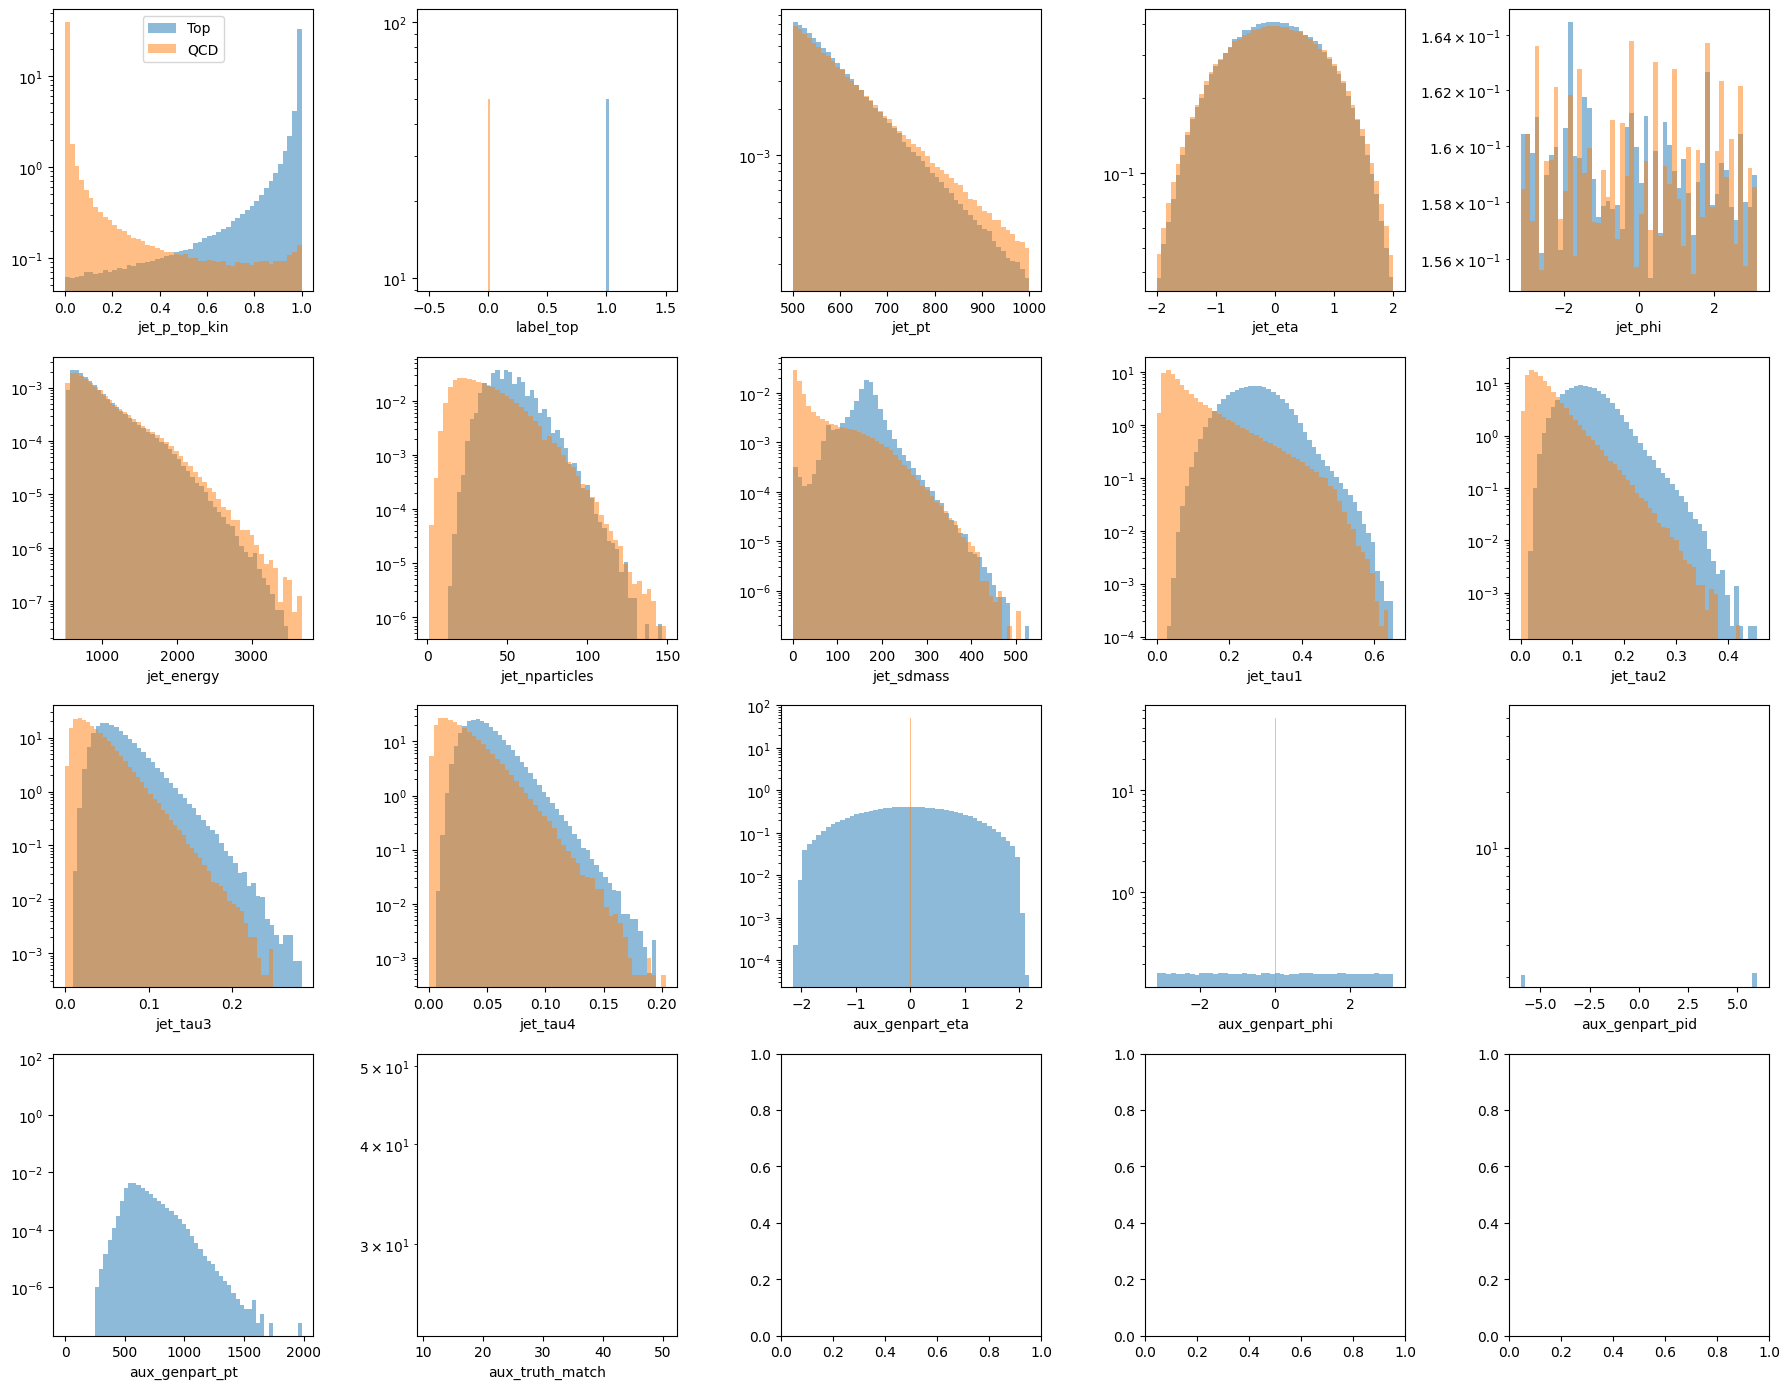

In [3]:
vars_to_plot = list(df_train.columns)

def plot_vars_in_df(df):
    fig, ax = plt.subplots(len(vars_to_plot) // 5 + 1, 5, figsize=(18, 14))
    ax = ax.flatten()
    is_top = df["label_top"] == 1
    hist_kwargs = dict(bins=50, alpha=0.5, density=True)
    for i, var_name in enumerate(vars_to_plot):
        ax[i].hist(df[is_top][var_name], label="Top", **hist_kwargs)
        ax[i].hist(df[~is_top][var_name], label="QCD", **hist_kwargs)
        ax[i].set_xlabel(var_name)
        ax[i].set_yscale("log")
    ax[0].legend()
    plt.tight_layout()
    plt.show()
    
plot_vars_in_df(df_train)
plot_vars_in_df(df_val)
plot_vars_in_df(df_test)